<a href="https://colab.research.google.com/github/MartinPdeS/FlowCyPy/blob/master/workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
_ = """
Flow Cytometry Simulation and 2D Density Plot of Scattering Intensities
=======================================================================

This example demonstrates how to simulate a flow cytometer using the FlowCyPy library, analyze the pulse
signals from two detectors, and plot a 2D density plot of the scattering intensities.

Flow cytometry is a technique used to analyze the physical and chemical properties of particles as they flow
through a laser beam. This script simulates the behavior of particles in a flow, models the light scattering
detected by two detectors, and visualizes the scattering intensity data in a 2D hexbin plot.

Steps in the Script:
--------------------
1. Importing the necessary libraries.
1. Define the flow parameters (e.g., speed, area, scatterer density).
2. Create a particle size distribution.
3. Set up a laser source and detectors.
4. Simulate the flow cytometry experiment.
5. Analyze the pulse signals from both detectors.
6. Plot a 2D density plot of the scattering intensities from the two detectors.
"""

In [16]:
!pip install FlowCyPy --quiet

Step 0: Importing libraries
---------------------------

----

In [17]:
from FlowCyPy import FlowCytometer, ScattererDistribution, Analyzer, Detector, Source, FlowCell, Plotter
from FlowCyPy.distribution import NormalDistribution
from FlowCyPy.peak_detector import BasicPeakDetector
from FlowCyPy.units import meter, second, milliliter, particle, micrometer, millisecond, nanometer
import numpy as np

np.random.seed(20)

Step 1: Defining the flow cell instance
---------------------------------------

----

In [18]:
# Define the Flow Parameters
flow = FlowCell(
    flow_speed=7.56 * meter / second,                  # Flow speed: 8 micrometers per second
    flow_area=(10 * micrometer) ** 2,                  # Flow area: 1 square micrometer
    total_time=0.1 * millisecond,                      # Total simulation time: 8 seconds
    scatterer_density=1.8e+9  * particle / milliliter  # Particle density: 1e12 particles per cubic meter
)

Step 2: Defining the scatterer distribution instance
----------------------------------------------------

----

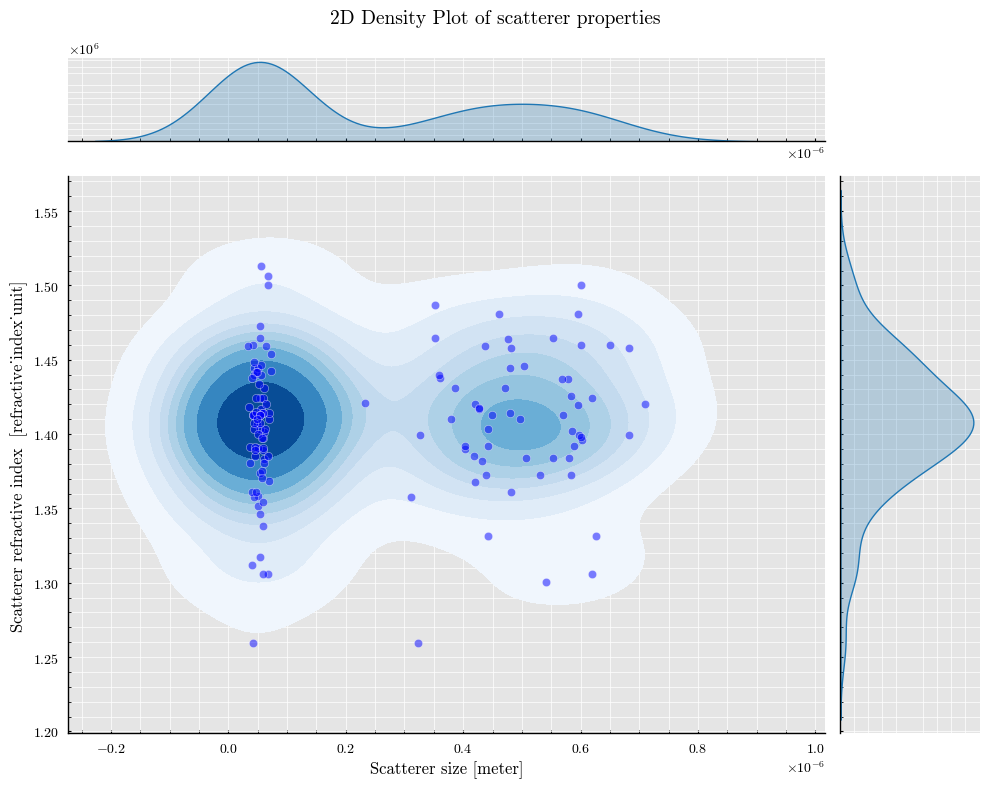

In [20]:
# Define Particle Size Distributions (Two Normal Distributions)
size_distribution_0 = NormalDistribution(
    scale_factor=1,
    mean=50 * nanometer,      # Mean particle size: 3 micrometers
    std_dev=10 * nanometer    # Standard deviation of particle size: 0.5 micrometer
)

size_distribution_1 = NormalDistribution(
    scale_factor=1,
    mean=500 * nanometer,      # Mean particle size: 30 micrometers
    std_dev=100 * nanometer    # Standard deviation of particle size: 1 micrometer
)

refractive_index_distribution = NormalDistribution(
    scale_factor=1,
    mean=1.4,                # Mean particle size: 30 micrometers
    std_dev=0.05               # Standard deviation of particle size: 1 micrometer
)

scatterer_distribution = ScattererDistribution(
    flow=flow,
    medium_refractive_index=[1.33],
    refractive_index=[refractive_index_distribution],      # Refractive index of the particles
    size=[size_distribution_0, size_distribution_1]  # List of distributions for different scatterer populations
)

scatterer_distribution.plot()

Step 3: Defining the source
---------------------------

----

In [21]:
# Set up the Laser Source
source = Source(
    NA=0.1,                    # Numerical aperture of the laser optics
    wavelength=800e-9,         # Laser wavelength: 800 nm
    optical_power=20e-3        # Laser optical power: 20 milliwatt
)

Step 4: Defining the detectors
------------------------------

----

In [22]:
# Set up Detectors (Two Detectors at Different Angles)
detector_0 = Detector(
    phi_angle=90,               # Angle: 90 degrees (Side Scatter)
    NA=1.2,                     # Numerical aperture of the detector optics
    name='Side',                # Name of the detector
    responsitivity=1,           # Responsitivity of the detector
    acquisition_frequency=10e6, # Sampling frequency: 10 MHz
    noise_level=0e-2,           # No noise
    baseline_shift=0.00,        # No baseline shift
    saturation_level=30,        # No signal saturation
    n_bins='12bit'              # Discretization bins
)

detector_1 = Detector(
    phi_angle=180,              # Angle: 180 degrees (Forward Scatter)
    NA=1.2,                     # Numerical aperture of the detector optics
    name='Front',               # Name of the detector
    responsitivity=1,           # Responsitivity of the detector
    acquisition_frequency=10e6, # Sampling frequency: 10 MHz
    noise_level=0e-2,           # No noise
    baseline_shift=0.00,        # No baseline shift
    saturation_level=30,        # No signal saturation
    n_bins='12bit'              # Discretization bins
)

Step 5: Defining the cytometre instance
---------------------------------------

----

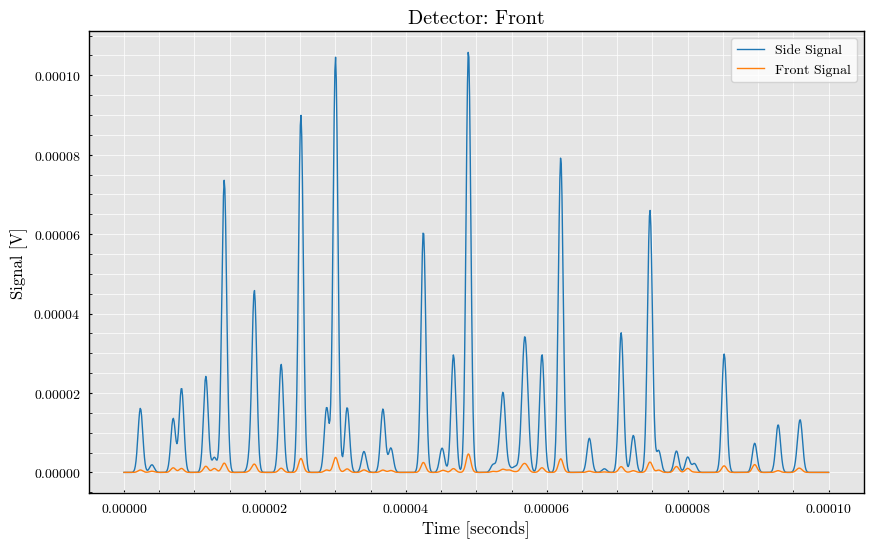

In [23]:
# Simulate the Flow Cytometry Experiment
cytometer = FlowCytometer(
    coupling_mechanism='mie',   # Use Mie scattering for particle simulation
    source=source,              # Laser source
    scatterer_distribution=scatterer_distribution,  # Particle size distribution
    detectors=[detector_0, detector_1]  # Two detectors in the setup
)

# Run the simulation to generate the scattering signals
cytometer.simulate_pulse()

# Plot the scattering signals for both detectors
cytometer.plot()

Step 6: Instantiating the Peak Analyzer
---------------------------------------

----

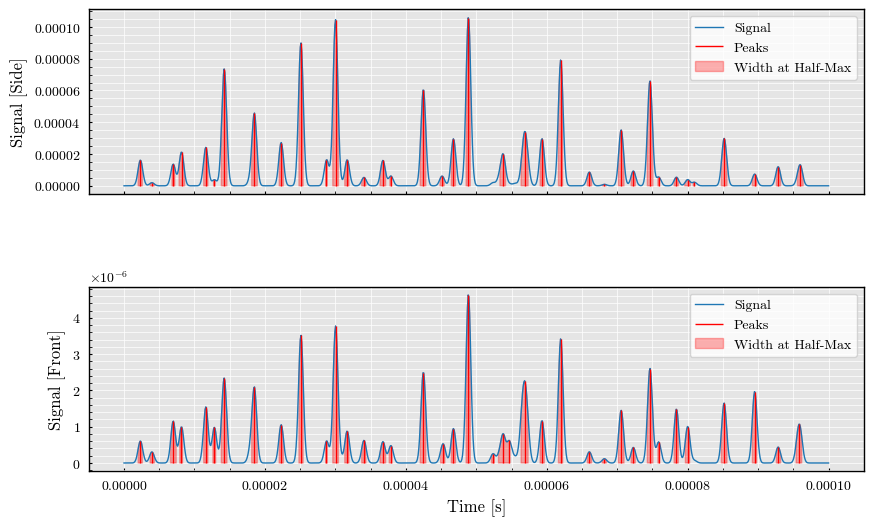

In [24]:
# Analyze the Pulse Signals
analyzer = Analyzer(detector_0, detector_1, algorithm=BasicPeakDetector())

# Analyze and extract data from both detectors
analyzer.run_analysis(
    compute_peak_area=False,   # Set whether to compute peak area
)

analyzer.plot()

Step 07: Getting the coincidence measurements
---------------------------------------------

----

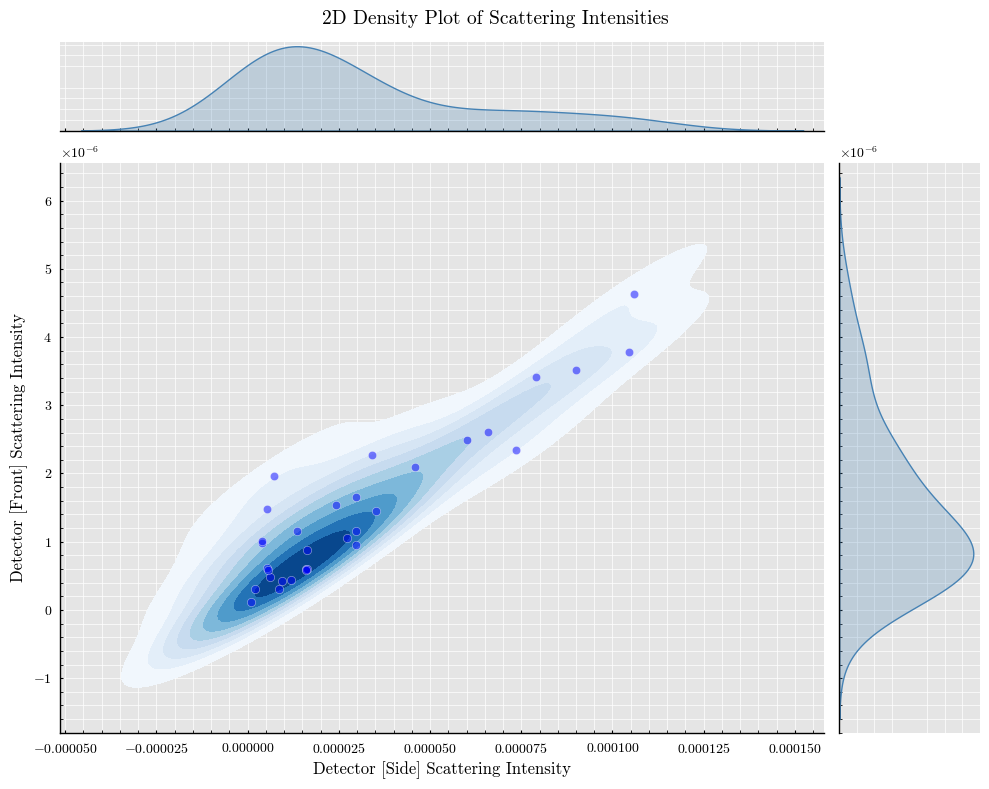

In [25]:
# Get coincidence data from the two detectors
datasets = analyzer.get_coincidence_dataset(coincidence_margin=1e-7)

# Plot the 2D Density of Scattering Intensities
plotter = Plotter(
    dataset_0=datasets[0],  # Processed data from the first detector
    dataset_1=datasets[1],  # Processed data from the second detector
)

# Plot the 2D density plot
plotter.plot()